**1.DOWNLOAD THE DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten,Dense

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**2.IMAGE AUGUMENTATION**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/Training",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 1238 images belonging to 4 classes.


In [ ]:
#load your images data

x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/Testing",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 326 images belonging to 4 classes.


In [ ]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

**3.CREATE MODEL**

In [ ]:
#initialize the model
model=Sequential()

**4.ADD LAYERS(Convolution,MxPooling,Flatten,Dense-(Hidden Layers),Output)**

In [ ]:
#add convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
#hidden layers
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))
#output layer
model.add(Dense(units=4,kernel_initializer="random_uniform",activation="softmax"))

**5.COMPILE THE MODEL**

In [ ]:
#compile the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

**6.FIT THE MODEL**

In [ ]:
model.fit_generator(x_train,steps_per_epoch=39,epochs=25,validation_data=x_test,validation_steps=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/25
39/39 [==============================] - 213s 5s/step - loss: 1.3571 - accuracy: 0.3086 - val_loss: 1.2797 - val_accuracy: 0.3844
Epoch 2/25
39/39 [==============================] - 31s 796ms/step - loss: 1.2132 - accuracy: 0.4338 - val_loss: 0.9831 - val_accuracy: 0.5469
Epoch 3/25
39/39 [==============================] - 31s 794ms/step - loss: 0.9853 - accuracy: 0.5792 - val_loss: 0.8243 - val_accuracy: 0.6500
Epoch 4/25
39/39 [==============================] - 31s 790ms/step - loss: 0.8966 - accuracy: 0.6284 - val_loss: 0.7700 - val_accuracy: 0.6781
Epoch 5/25
39/39 [==============================] - 31s 793ms/step - loss: 0.8226 - accuracy: 0.6656 - val_loss: 0.6223 - val_accuracy: 0.7656
Epoch 6/25
39/39 [==============================] - 31s 800ms/step - loss: 0.7507 - accuracy: 0.6922 - val_loss: 0.5325 - val_accuracy: 0.8344
Epoch 7/25
39/39 [==============================] - 31s 796ms/step - loss: 0.7334 - accuracy: 0.6931 - val_loss: 0.6391 - val_accuracy: 0.7563
E

**7.SAVE THE MODEL**

In [ ]:
model.save("animal.h5")

**8.TEST THE MODEL**

In [85]:
#CNN prediction
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np

In [71]:
model = load_model('animal.h5')
img = image.load_img('/content/drive/MyDrive/dataset/Testing/crows/Z1  (28).jpg',target_size=(64,64))

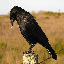

In [72]:
img

In [73]:
type(img)

PIL.Image.Image

In [75]:
x=image.img_to_array(img)

In [76]:
x

array([[[230., 238., 240.],
        [235., 239., 242.],
        [235., 239., 242.],
        ...,
        [241., 242., 244.],
        [242., 241., 246.],
        [242., 241., 246.]],

       [[234., 238., 241.],
        [235., 239., 242.],
        [235., 239., 242.],
        ...,
        [240., 241., 243.],
        [241., 240., 245.],
        [242., 241., 246.]],

       [[234., 238., 241.],
        [234., 238., 241.],
        [234., 238., 241.],
        ...,
        [242., 241., 246.],
        [242., 242., 244.],
        [242., 242., 244.]],

       ...,

       [[136.,  97.,  30.],
        [147., 112.,  56.],
        [168., 128.,  59.],
        ...,
        [161., 122.,  53.],
        [159., 124.,  58.],
        [171., 132.,  63.]],

       [[136.,  99.,  29.],
        [147., 112.,  44.],
        [176., 132.,  71.],
        ...,
        [166., 128.,  65.],
        [164., 126.,  53.],
        [176., 131.,  64.]],

       [[148., 109.,  50.],
        [151., 115.,  55.],
        [191., 1

In [77]:
x.shape

(64, 64, 3)

In [78]:
x=np.expand_dims(x,axis=0)

In [79]:
pred_prob=model.predict(x)

In [80]:
pred_prob

array([[0., 1., 0., 0.]], dtype=float32)

In [81]:
class_name=['Bear','Crow','Elephant','Rat']

In [82]:
pred_id=pred_prob.argmax(axis=1)[0]

In [83]:
pred_id

1

In [84]:
print('Predicted animal is',str(class_name[pred_id]))

Predicted animal is Crow
